In [44]:
#this is the analysis portion of homework exercise 1
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import gmaps
from gmaps_api_key import g_key
import requests
import json
import pprint

#read in api data from .csv file

w_df = pd.read_csv("city_weather_1_5_21_try2.csv")

w_df.head(15)

,city_name,country,date,lat,lon,max_temp_C,cloud_cover%,humidity%,wind_speed
0,George Town,MY,1609884235,5.4112,100.3354,25.00,40.0,94.0,3.10
1,Port Elizabeth,ZA,1609884235,-33.9180,25.5701,21.00,58.0,83.0,1.50
2,Port-Gentil,GA,1609884235,-0.7193,8.7815,28.00,75.0,88.0,4.10
3,Rabaul,PG,1609884235,-4.1967,152.1721,25.11,100.0,87.0,0.51
4,Dingle,PH,1609884236,10.9995,122.6711,23.56,87.0,91.0,3.43
5,Arraial do Cabo,BR,1609884236,-22.9661,-42.0278,28.00,40.0,74.0,5.10
6,Faanui,PF,1609884236,-16.4833,-151.7500,27.39,14.0,75.0,5.80
7,Lobito,AO,1609884236,-12.3481,13.5456,24.23,0.0,78.0,2.91
8,Albany,US,1609884133,42.6001,-73.9662,1.11,97.0,81.0,1.30
9,Hermanus,ZA,1609884237,-34.4187,19.2345,15.56,2.0,91.0,0.97


In [45]:
#calculate basic descriptive statistics

w_df.describe()

,date,lat,lon,max_temp_C,cloud_cover%,humidity%,wind_speed
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,1.609884e+09,18.137548,18.922793,10.649086,58.435852,74.794376,3.721178
std,9.393430e+01,33.716001,90.000096,18.043204,38.995664,18.776153,2.680478
min,1.609884e+09,-54.800000,-175.200000,-47.000000,0.000000,9.000000,0.130000
25%,1.609884e+09,-9.665800,-60.633300,1.000000,20.000000,67.000000,1.500000
50%,1.609884e+09,19.266700,20.832400,18.000000,75.000000,80.000000,3.100000
75%,1.609884e+09,48.649900,101.383300,24.920000,93.000000,88.000000,5.100000
max,1.609884e+09,78.218600,179.316700,32.000000,100.000000,100.000000,18.500000


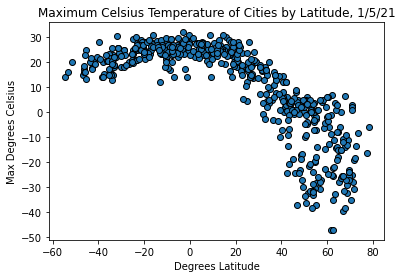

In [46]:
#plot latitude vs max temperature in celsius

plt.scatter(w_df['lat'], w_df['max_temp_C'], edgecolors = 'black')
plt.title('Maximum Celsius Temperature of Cities by Latitude, 1/5/21')
plt.xlabel('Degrees Latitude')
plt.ylabel('Max Degrees Celsius')

plt.show()

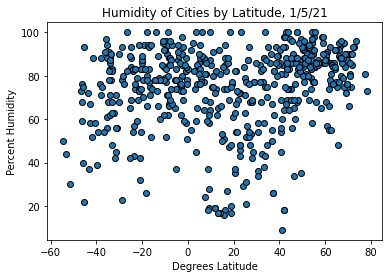

In [47]:
#plot latitude vs humidity

plt.scatter(w_df['lat'], w_df['humidity%'], edgecolors = 'black')
plt.title('Humidity of Cities by Latitude, 1/5/21')
plt.xlabel('Degrees Latitude')
plt.ylabel('Percent Humidity')

plt.show()

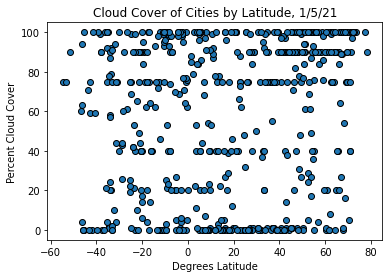

In [48]:
#plot latitude vs cloudiness


plt.scatter(w_df['lat'], w_df['cloud_cover%'], edgecolors = 'black')
plt.title('Cloud Cover of Cities by Latitude, 1/5/21')
plt.xlabel('Degrees Latitude')
plt.ylabel('Percent Cloud Cover')

plt.show()

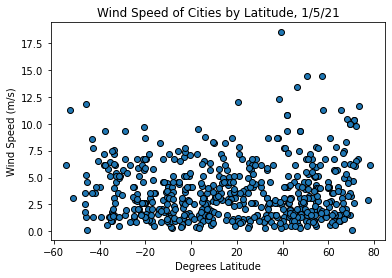

In [49]:
#plot latitude vs wind speed

plt.scatter(w_df['lat'], w_df['wind_speed'], edgecolors = 'black')
plt.title('Wind Speed of Cities by Latitude, 1/5/21')
plt.xlabel('Degrees Latitude')
plt.ylabel('Wind Speed (m/s)')

plt.show()

In [50]:
#Worlds Coldest Cities Today

coldest_df = w_df[['city_name','country', 'max_temp_C']].copy()

coldest_df.sort_values(by = ['max_temp_C'], inplace = True,  ascending = True)

coldest_df.head(30)

,city_name,country,max_temp_C
518,Mayya,RU,-47.00
535,Namtsy,RU,-47.00
293,Zhigansk,RU,-39.53
309,Batagay,RU,-38.40
476,Tokur,RU,-38.05
510,Baruun-Urt,MN,-37.14
30,Tynda,RU,-37.00
496,Bayangol,RU,-36.20
104,Clyde River,CA,-35.00
286,Omsukchan,RU,-34.89


In [51]:
#Worlds Windiest Cities Today

windiest_df = w_df[['city_name','country', 'wind_speed']].copy()

windiest_df.sort_values(by = ['wind_speed'], inplace = True,  ascending = False)

windiest_df.head(10)

,city_name,country,wind_speed
263,Lagoa,PT,18.50
508,Sitka,US,14.40
324,Port Hardy,CA,14.40
365,Miles City,US,13.40
154,Ribeira Grande,PT,12.30
349,Basco,PH,12.05
311,Comodoro Rivadavia,AR,11.80
27,Dikson,RU,11.64
114,Saint Paul Harbor,US,11.30
52,Punta Arenas,CL,11.30


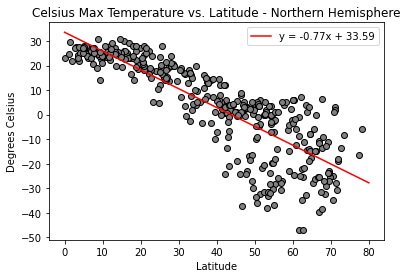

R squared = 0.6951627877947754
Pearson r = -0.8337642279414341


In [52]:
#Linear Regression Northern Hemisphere

#setting up filters
north = w_df['lat']> 0

south = w_df['lat']< 0

#creating filter dataframes
nord_df = w_df[north]

sout_df = w_df[south]

#Pearson r calculation
l_T_corr = st.pearsonr(nord_df["lat"], nord_df["max_temp_C"])

#linear regression analysis
nslope, nint, n_r_val, n_p_val, n_std_er = st.linregress(nord_df["lat"],nord_df["max_temp_C"])

#linear regression plot

ndom = [0, 20, 40, 60, 80]

ndom = np.asarray(ndom)

#useful source for regression line:
#https://stackoverflow.com/questions/48370562/how-to-add-regression-line-and-regression-line-equation-on-graph

plt.scatter(nord_df['lat'], nord_df['max_temp_C'], edgecolors = 'black', c = 'grey')
plt.plot(ndom, nslope*ndom + nint, 'r', label = 'y = {:.2f}x + {:.2f}'.format(nslope, nint))
plt.title('Celsius Max Temperature vs. Latitude - Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Degrees Celsius')
plt.legend()

plt.show()

print(f'R squared = {n_r_val**2}')
print(f'Pearson r = {l_T_corr[0]}')


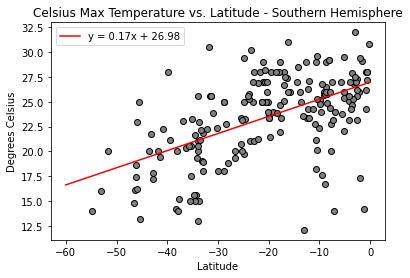

R squared = 0.3006851047240343
Pearson r = 0.5483476130376007


In [53]:
#Linear Regression Southern Hemisphere
#Pearson r calculation
s_l_T_corr = st.pearsonr(sout_df["lat"], sout_df["max_temp_C"])

#linear regression analysis
sslope, sint, s_r_val, s_p_val, s_std_er = st.linregress(sout_df["lat"],sout_df["max_temp_C"])

#linear regression plot

sdom = [0, -20, -40, -60]

sdom = np.asarray(sdom)

plt.scatter(sout_df['lat'], sout_df['max_temp_C'], edgecolors = 'black', c = 'grey')
plt.plot(sdom, sslope*sdom + sint, 'r', label = 'y = {:.2f}x + {:.2f}'.format(sslope, sint))
plt.title('Celsius Max Temperature vs. Latitude - Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Degrees Celsius')
plt.legend()

plt.show()

print(f'R squared = {s_r_val**2}')
print(f'Pearson r = {s_l_T_corr[0]}')


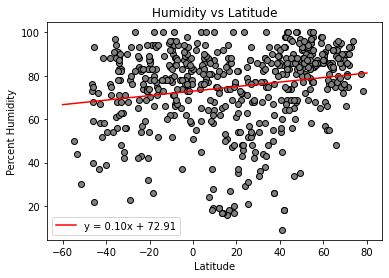

R squared = 0.0348425363349418
Pearson r = 0.1866615555890977


In [54]:
#Linear Regression Humidity

#Pearson r calculation
h_l_T_corr = st.pearsonr(w_df["lat"], w_df["humidity%"])

#linear regression analysis
hslope, hint, h_r_val, h_p_val, h_std_er = st.linregress(w_df["lat"],w_df["humidity%"])

#linear regression plot

hdom = [-60, -40, -20, 0, 20, 40, 60, 80]

hdom = np.asarray(hdom)

plt.scatter(w_df["lat"], w_df["humidity%"], edgecolors = 'black', c = 'grey')
plt.plot(hdom, hslope*hdom + hint, 'r', label = 'y = {:.2f}x + {:.2f}'.format(hslope, hint))
plt.title('Humidity vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Percent Humidity')
plt.legend()

plt.show()

print(f'R squared = {h_r_val**2}')
print(f'Pearson r = {h_l_T_corr[0]}')


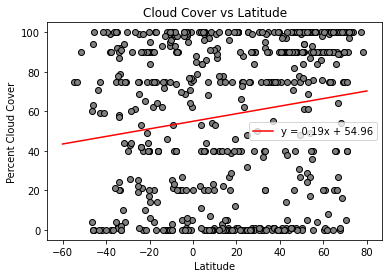

R squared = 0.0274642106568119
Pearson r = 0.165723295456046


In [55]:
#Linear Regression Cloud Cover

#Pearson r calculation
c_l_T_corr = st.pearsonr(w_df["lat"], w_df["cloud_cover%"])

#linear regression analysis
cslope, cint, c_r_val, c_p_val, c_std_er = st.linregress(w_df["lat"],w_df["cloud_cover%"])

#linear regression plot

plt.scatter(w_df["lat"], w_df["cloud_cover%"], edgecolors = 'black', c = 'grey')
plt.plot(hdom, cslope*hdom + cint, 'r', label = 'y = {:.2f}x + {:.2f}'.format(cslope, cint))
plt.title('Cloud Cover vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Percent Cloud Cover')
plt.legend()

plt.show()

print(f'R squared = {c_r_val**2}')
print(f'Pearson r = {c_l_T_corr[0]}')

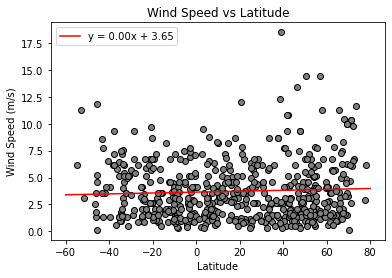

R squared = 0.002775416249235306
Pearson r = 0.05268221947901687


In [56]:
#Linear Regression Wind Speed

#Pearson r calculation
w_l_T_corr = st.pearsonr(w_df["lat"], w_df["wind_speed"])

#linear regression analysis
wslope, wint, w_r_val, w_p_val, w_std_er = st.linregress(w_df["lat"],w_df["wind_speed"])

#linear regression plot

plt.scatter(w_df["lat"], w_df["wind_speed"], edgecolors = 'black', c = 'grey')
plt.plot(hdom, wslope*hdom + wint, 'r', label = 'y = {:.2f}x + {:.2f}'.format(wslope, wint))
plt.title('Wind Speed vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.legend()

plt.show()

print(f'R squared = {w_r_val**2}')
print(f'Pearson r = {w_l_T_corr[0]}')

In [57]:
#Vacation planning with filters
#I want to spend my vacation dogsledding and learning about life in extreme cold climates
#I will set up filters for very cold environments, with low cloudiness, and low windspeed

#dfs of cold places 
#very cold
vc_df = w_df[w_df['max_temp_C'] < -20]

#extreme cold
xc_df = w_df[w_df['max_temp_C'] < -30]

#low cloudiness
vclc_df = vc_df[vc_df['cloud_cover%'] < 30]
xclc_df = xc_df[xc_df['cloud_cover%'] < 30]

#low windspeed and low cloudiness
vclclw_df = vclc_df[vclc_df['wind_speed'] < 2]
xclclw_df = xclc_df[xclc_df['wind_speed'] < 2]

#counts output of suitable places

print(f'The number of very cold cities is: {len(vc_df)}')
print(f'The number of extremely cold cities is: {len(xc_df)}')
print(f'The number of very cold cities is with suitable cloudiness is: {len(vclc_df)}')
print(f'The number of extremely cold cities is with suitable cloudiness is: {len(xclc_df)}')
print(f'The number of very cold cities is with ideal wind and clouds is: {len(vclclw_df)}')
print(f'The number of extremely cold cities is with ideal wind and clouds is: {len(xclclw_df)}')
print(f'The ideal cities for your vacation are:')

xclclw_df

The number of very cold cities is: 57
The number of extremely cold cities is: 23
The number of very cold cities is with suitable cloudiness is: 12
The number of extremely cold cities is with suitable cloudiness is: 7
The number of very cold cities is with ideal wind and clouds is: 7
The number of extremely cold cities is with ideal wind and clouds is: 6
The ideal cities for your vacation are:


,city_name,country,date,lat,lon,max_temp_C,cloud_cover%,humidity%,wind_speed
94,Zyryanskoye,RU,1609884262,56.8306,86.6258,-30.70,4.0,87.0,1.14
104,Clyde River,CA,1609884264,70.4692,-68.5914,-35.00,5.0,66.0,0.14
218,Belyy Yar,RU,1609884301,53.6039,91.3903,-33.00,27.0,74.0,1.03
272,Tahe,CN,1609884315,52.3333,124.7333,-31.45,24.0,80.0,1.87
309,Batagay,RU,1609884325,67.6333,134.6333,-38.40,1.0,79.0,1.70
350,Karatuzskoye,RU,1609884340,53.6072,92.8667,-31.46,17.0,83.0,0.94


In [58]:
#setting up a call for possible hotels in google places - test call

#google places base url
p_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

#test params dict
#note: for the areas of the world I'm looking at, expecting a hotel within even 50 km is kind of optimistic
#this is why I'm using a radius of 50 km instead of 5 km (which didnt even work for Albany, NY for the record)

params = { "location": "56.8306, 86.6258", "radius":"50000", "type": "lodging", "key": g_key}

response = requests.get(p_url, params = params).json()

results = response['results']

#results

nm = results[0]['name']
city = results[0]['plus_code']['compound_code']
geolat = results[0]['geometry']['location']['lat']
geolon = results[0]['geometry']['location']['lng']

print(f'Hotel name is {nm}')
print(f'The location is {city}')
print(f'The geolocation is {geolat}, {geolon}')

Hotel name is Baza Otdykha "Irzhik"
The location is VV2H+CX Krasnoyarka, Tomsk Oblast, Russia
The geolocation is 56.8510012, 86.8799715


In [69]:
#iterative call to find several hotel options
#this list will hold hotel names
names = []

#this will be for the location of each hotel
places = []

#these are for coordinates
lats = []
lons = []

#new parameter dict
parits = {"radius":"50000", "type": "lodging", "key": g_key}

#this is my loop - right now it is hardcoded for the best cities for dogsledding

for index, row in xclclw_df.iterrows():
    #get coordinates from the dataframe
    lati = row['lat']
    longi = row['lon']
    
    #plug the location data in the parameters f statement is necessary so that the data is 
    #inputted into the url as a string
    
    locate = f'{lati}, {longi}'
    
    #add the keyword
    parits['location'] = locate
    
    #make a call to the api
    response = requests.get(p_url, params = parits).json()
    
    #get results
    results = response['results']
    
    #try to add the results to a list
    try:
        names.append(results[0]['name'])
        places.append(results[0]['plus_code']['compound_code'])
        lats.append(results[0]['geometry']['location']['lat'])
        lons.append(results[0]['geometry']['location']['lng'])
        print(f'Lodging found')
    except:
        print(f'No lodging in this location')
    
#show the call list is complete
print(f'Data requests finished')
        

Lodging found
Lodging found
Lodging found
Lodging found
Lodging found
Lodging found
Data requests finished


In [70]:
hotels_dict = {"name": names, "location":places, "lat":lats, "lng":lons}

hotels_df = pd.DataFrame(hotels_dict)

hotels_df

,name,location,lat,lng
0,"Baza Otdykha ""Irzhik""","VV2H+CX Krasnoyarka, Tomsk Oblast, Russia",56.851001,86.879971
1,Qamaq Hotel,"FCC6+GF Clyde River, NU, Canada",70.471292,-68.588759
2,Abakan hotel,"PCCW+WQ Abakan, Republic of Khakassia, Russia",53.722279,91.446938
3,塔河宾馆,"8PQ6+RQ Tahezhen, Tahe County, Daxing'anling P...",52.339587,124.711897
4,Gostinitsa Ki'ileekh,"MJ5X+P8 Batagay, Sakha Republic, Russia",67.659277,134.648257
5,Krasnyy Dar,"WWH8+PV Kurskoye, Krasnoyarsk Krai, Russia",53.929313,92.917228


In [71]:
#Geoplotting - Extremely Cold Cities (less than -30C )

#access google maps api with my api key
gmaps.configure(api_key= g_key)

#figure layout table

fig_layout = {
    'width' : '500px',
    'height': '500px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}

xc_fig = gmaps.figure(layout = fig_layout)
#this layer adds markers at the specified coordinates

xc_l = gmaps.marker_layer(xc_df[['lat', 'lon']] )

xc_fig.add_layer(xc_l)

xc_fig

Figure(layout=FigureLayout(border='1px solid black', height='500px', margin='0 auto 0 auto', padding='1px', wi…

In [72]:
#Geoplotting - Very Cold Cities (Less than -20 C)

#access google maps api with my api key
gmaps.configure(api_key= g_key)

#figure layout table

fig_layout = {
    'width' : '500px',
    'height': '500px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}

vc_fig = gmaps.figure(layout = fig_layout)
#this layer adds markers at the specified coordinates

vc_l = gmaps.marker_layer(vc_df[['lat', 'lon']] )

vc_fig.add_layer(vc_l)

vc_fig

Figure(layout=FigureLayout(border='1px solid black', height='500px', margin='0 auto 0 auto', padding='1px', wi…

In [77]:
#geoplotting - humidity and vacation spots
#access google maps api with my api key
gmaps.configure(api_key= g_key)

#figure layout table

fig_layout = {
    'width' : '500px',
    'height': '500px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}

hum_fig = gmaps.figure(layout = fig_layout)

#this layer adds markers at the specified coordinates

hum_l = gmaps.heatmap_layer(w_df[['lat', 'lon']], weights = w_df['humidity%'].astype(float), 
                              dissipating=False, max_intensity=150, point_radius=3 )


hum_fig.add_layer(hum_l)

#Info Box solution copied very closely from documentation
#https://jupyter-gmaps.readthedocs.io/en/latest/tutorial.html
#that includes everthing down to the line that defines the marker layer

hotel_list = [
   {'name': names[0] , 'geolocation':(lats[0], lons[0]) , 'location':places[0]}, 
   {'name': names[1] , 'geolocation':(lats[1], lons[1]) , 'location':places[1]},
   {'name': names[2] , 'geolocation':(lats[2], lons[2]) , 'location':places[2]},
   {'name': names[3] , 'geolocation':(lats[3], lons[3]) , 'location':places[3]},
   {'name': names[4] , 'geolocation':(lats[4], lons[4]) , 'location':places[4]},
   {'name': names[5] , 'geolocation':(lats[5], lons[5]) , 'location':places[5]} 
]

hotel_coords = [hotel['geolocation'] for hotel in hotel_list]

info_box_template = """
<dl>
<dt>Name</dt><dd>{name}</dd>
<dt>Location</dt><dd>{location}</dd>
</dl>
"""

hotel_info = [info_box_template.format(**hotel) for hotel in hotel_list]

hot_l = gmaps.marker_layer(hotel_coords, info_box_content=hotel_info)

hum_fig.add_layer(hot_l)

hum_fig

Figure(layout=FigureLayout(border='1px solid black', height='500px', margin='0 auto 0 auto', padding='1px', wi…